<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/LinearRegression%2CRidge%2CLasso%2CElasticNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
[24.  21.6 34.7 33.4 36.2]


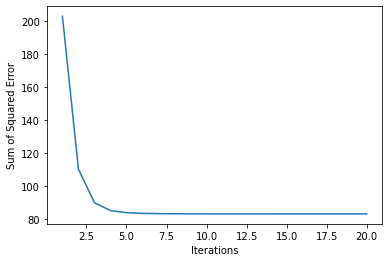

Root mean squared error: 0.738966525893207


In [1]:
import numpy as np#벡터와 행렬 연산 

class LinearRegressionGD(object):#선형회귀
  def __init__(self,eta=0.001,n_iter=20):#생성자 값 설정
    self.eta=eta
    self.n_iter=n_iter
  def fit(self,X,y):
    self.w_=np.zeros(1+X.shape[1])#가중치를 배열로 정의.X.shape[1]은 학습 데이터의 입력값 개수
    self.cost_=[]#비용

    for i in range(self.n_iter):#n_iter만큼 반복
      output=self.net_input(X)
      errors=(y-output)#오류회수 설정
      self.w_[1:]+=self.eta*X.T.dot(errors)#가중치을 업데이트
      self.w_[0]+=self.eta*errors.sum()#가중치의 합 더함
      cost=(errors**2).sum()/2.0#비용계산
      self.cost_.append(cost)#비용 배열에 더함
    return self

  def net_input(self,X):
    return np.dot(X,self.w_[1:]) +self.w_[0]#학습 데이터 X입력값과 가중치를 곱한 총합,즉 순입력 함수 결과값

  def predict(self,X):
    return self.net_input(X)#예측 값 반환

import pandas as pd#데이터 분석
from sklearn.datasets import load_boston#load_boston데이터 불러옴
from sklearn.model_selection import train_test_split#학습,테스트 데이터 분히
from sklearn.preprocessing import StandardScaler#스케일 조정 위함

boston=load_boston()#load_boston데이터 불러옴
data=pd.DataFrame(boston.data,columns=feature_names)#칼럼을feature_names으로 2차원 데이터 저장

X=data[['RM','PTRATIO']].values#'RM','PTRATIO'의 값을 X로 설정
y=boston.target#target정보 y로 설정

print(data.head())#DataFrame처음 줄 출력
print(y[0:5])#y[0:5]출력

sc_x=StandardScaler()#기본 스케일링(평균과 표준편차 사용) 
sc_y=StandardScaler()#기본 스케일링(평균과 표준편차 사용) 
X_std=sc_x.fit_transform(X)#X를 fit,transform수행
y_std=sc_x.fit_transform(y[:,np.newaxis]).flatten()#np.newaxis로 2차원 배열 형태 맞춤,flatten통해 본래 1차원 배열로 변형
X_train,X_test,y_train,y_test=train_test_split(X_std,y_std,test_size=0.2,random_state=123))#난수생성 123으로 초기화,20% 80%로 테스트,학습 데이터 분류

lr=LinearRegressionGD()#선형회귀
lr.fit(X_train,y_train)#X_train,y_train로 예측

import matplotlib.pyplot as plt#그래프 시각화 휘함
plt.plot(range(1,lr.n_iter+1),lr.cost_)#range범위x축,비용 y축
plt.ylabel('Sum of Squared Error')#x축 라벨 설정
plt.xlabel('Iterations')#y축 라벨 설정
plt.show()#그래프 출력

from sklearn.metrics import mean_squared_error#성능 측정
preds=lr.predict(X_test)#X_test로 예측
mse=mean_squared_error(y_test,preds)#에러값 계산
print('Root mean squared error:',np.sqrt(mse))#에러 제곱근 출력


In [ ]:
import numpy as np#벡터와 행렬 연산 
import pandas as pd#데이터 분석
from sklearn.datasets import load_boston#load_boston데이터 불러옴
from sklearn.model_selection import train_test_split#학습,테스트 데이터 분히
from sklearn.preprocessing import StandardScaler#스케일 조정 위함
import matplotlib.pyplot as plt#그래프 시각화 위함
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet#선형회귀,리지회귀,라소회귀,일레스틱 넷 회귀
from sklearn.metrics import mean_squared_error#성능 측정


boston=load_boston()#load_boston데이터 불러옴
data=pd.DataFrame(boston.data,columns=feature_names)#칼럼을feature_names으로 2차원 데이터 저장
X=data[['RM','PTRATIO']].values#'RM','PTRATIO','RAD','TAX','LSTAT','CRIM','NOX','B'의 값을 X로 설정
y=boston.target#target정보 y로 설정

sc_x=StandardScaler()#기본 스케일링(평균과 표준편차 사용) 
sc_y=StandardScaler()#기본 스케일링(평균과 표준편차 사용) 
X_std=sc_x.fit_transform(X)#X를 fit,transform수행
y_std=sc_x.fit_transform(y[:,np.newaxis]).flatten()#np.newaxis로 2차원 배열 형태 맞춤,flatten통해 본래 1차원 배열로 변형
X_train,X_test,y_train,y_test=train_test_split(X_std,y_std,test_size=0.2,random_state=123))#난수생성 123으로 초기화,20% 80%로 테스트,학습 데이터 분류

linear=LinearRegression()#선형회귀 
ridge=Ridge(alpha=1.0,random_state=0)#단순화 정도 1.0으로 리지모델 적용
lasso=Lasso(alpha=1.0,random_state=0)#단순화 정도 1.0으로 라소모델 적용
enet=ElasticNet(alpha=1.0,l1_ratio=0.5)#단순화 정도 1.0으로 일레스틱 넷 모델 적용

linear.fit(X_train,y_train)#X_train로 선형모델 데이터 변환
ridge.fit(X_train,y_train)#X_train,y_train로 리지모델 데이터 변환
lasso.fit(X_train,y_train)#X_train,y_train로 라소모델 데이터 변환
enet.fit(X_train,y_train)#X_train,y_train로 일레스틱 넷 모델 데이터 변환

linear_pred=linear.predict(X_train)#X_train로 선형모델 예측
ridge_pred=ridge.predict(X_train)#X_train로 리지모델 예측
lasso_pred=lasso.predict(X_train)#X_train로 라소모델 예측
enet_pred=enet.predict(X_train)#X_train로 일레스틱 넷 모델 예측

print('\nLinear-RMSE for training data:',np.sqrt(mean_squared_error(y_train,linear_pred)))#훈련데이터 선형모델 에러 제곱근 계산
print('\nRidger-RMSE for training data:',np.sqrt(mean_squared_error(y_train,ridge_pred)))#훈련데이터 리지모델 에러 제곱근 계산
print('\nLasso-RMSE for training data:',np.sqrt(mean_squared_error(y_train,lasso_pred)))#훈련데이터 라소모델 에러 제곱근 계산
print('\nEnet-RMSE for training data:',np.sqrt(mean_squared_error(y_train,enet_pred)))#훈련데이터 일레스틱 넷 모델 에러 제곱근 계산

linear_pred=linear.predict(X_test)#X_test로 선형모델 예측
ridge_pred=ridge.predict(X_test)#X_test로 선형모델 예측
lasso_pred=lasso.predict(X_test)#X_test로 선형모델 예측
enet_pred=enet.predict(X_test)#X_test로 선형모델 예측

print('\nLinear-RMSE for test data:',np.sqrt(mean_squared_error(y_test,linear_pred)))#학습데이터 선형모델 에러 제곱근 계산
print('\nRidger-RMSE for test data:',np.sqrt(mean_squared_error(y_test,ridge_pred)))#학습데이터 리지모델 에러 제곱근 계산
print('\nLasso-RMSE for test data:',np.sqrt(mean_squared_error(y_test,lasso_pred)))#학습데이터 라소모델 에러 제곱근 계산
print('\nEnet-RMSE for test data:',np.sqrt(mean_squared_error(y_test,enet_pred)))#학습데이터 일레스틱 넷 모델 에러 제곱근 계산
